In [16]:
from model_utils import *

In [17]:
MODEL_NAME = 'roberta-base'
LOG_DIR = "./news-classification"
file = 'data/fake-augmented_labeled_news.json'
MAX_SEQ_LENGTH = 128
BATCH_SIZE = 128
LEARN_RATE = 5.5e-5
EPOCH = 8
MAX_CATE_SIZE = 30000

## Train

init

In [18]:
# load data
labels,contents,lset,ldic = load_data(file,MAX_CATE_SIZE,percentage=1)

# encode 1 87s
start = time.time()
encodings_list = pre_encode_list(MODEL_NAME,contents,MAX_SEQ_LENGTH)
print('encoding time cost :',time.time()-start)

# load dataset
train_dataset = NewsCategoryDataset(labels, encodings_list, contents, ldic)
valid_dataset = NewsCategoryDataset(labels, encodings_list, contents, ldic, 'val')
test_dataset = NewsCategoryDataset(labels, encodings_list, contents, ldic, 'test')
print('data loaded \ntrain:{}\nvalid:{}\ntest:{}'.format(len(train_dataset),
                                                          len(valid_dataset),
                                                          len(test_dataset)))

# dataloader
train_val_loaders = {
    "train": DataLoader(dataset=train_dataset,
                        batch_size=BATCH_SIZE,
                        shuffle=True),
    "valid": DataLoader(dataset=valid_dataset,
                        batch_size=BATCH_SIZE,
                        shuffle=False),
    "test": DataLoader(dataset=test_dataset,
                       batch_size=BATCH_SIZE,
                       shuffle=False)
}

Data loaded:  567156 567156


100%|██████████| 567156/567156 [02:06<00:00, 4499.67it/s]

Tokenizer loaded...
encoding time cost : 130.31486415863037
data loaded 
train:397009
valid:85074
test:85073


In [5]:
if not os.path.exists('./en-results'):
    os.makedirs('./en-results/')
if not os.path.exists('./en-results/{}-{}'.format(LEARN_RATE,MAX_SEQ_LENGTH)):
    os.makedirs('./en-results/{}-{}'.format(LEARN_RATE,MAX_SEQ_LENGTH))

## From pre-training

In [19]:
model = RobertaForSequenceClassification(MODEL_NAME,len(ldic))
model.apply(weight_init)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


RobertaForSequenceClassification(
  (bert): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm

## load unfinished

In [ ]:
model = RobertaForSequenceClassification(MODEL_NAME,len(lset))
state_dict = torch.load('./en-results/5e-5/6-21-epoch-3.pth')
model.load_state_dict(state_dict)

## Train

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=LEARN_RATE)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer)
if torch.cuda.is_available():
    model = nn.DataParallel(model)
    model.cuda()
acclist,losslist = train_classifier(model,EPOCH,LEARN_RATE, MAX_SEQ_LENGTH,
                                    train_val_loaders,criterion,'6-23',
                                    optimizer,scheduler, path='en-results')

epoch 0


  0%|          | 0/3102 [00:00<?, ?it/s]

Epoch 0 batch 3101, loss: 0.8744 acc: 74.0741 
validating...
After Epoch 0 , valid acc: 0.7444460117074547, avg loss1.4092395140385336  avg acc0.5955679169054613
epoch 1


  0%|          | 0/3102 [00:00<?, ?it/s]

Epoch 1 batch 3101, loss: 0.485 acc: 85.1852  
validating...
After Epoch 1 , valid acc: 0.8362484425323836, avg loss1.0715018955595565  avg acc0.6932735582031904
epoch 2


  0%|          | 0/3102 [00:00<?, ?it/s]

Epoch 2 batch 3101, loss: 0.5562 acc: 87.6543 
validating...
After Epoch 2 , valid acc: 0.8843242353715589, avg loss0.8730990299256468  avg acc0.7510855306579056
epoch 3


  0%|          | 0/3102 [00:00<?, ?it/s]

Epoch 3 batch 3101, loss: 0.2354 acc: 93.8272  
validating...
After Epoch 3 , valid acc: 0.906481416178856, avg loss0.7364819717216999  avg acc0.7906561972040143
epoch 4


  0%|          | 0/3102 [00:00<?, ?it/s]

Epoch 4 batch 3101, loss: 0.2973 acc: 91.358   
validating...
After Epoch 4 , valid acc: 0.9252650633566072, avg loss0.6362983672718111  avg acc0.8196768649358042
epoch 5


  0%|          | 0/3102 [00:00<?, ?it/s]

Epoch 5 batch 3101, loss: 0.2876 acc: 92.5926  
validating...
After Epoch 5 , valid acc: 0.9378776124315302, avg loss0.5597862203445549  avg acc0.8416573501547523
epoch 6


  0%|          | 0/3102 [00:00<?, ?it/s]

Epoch 6 batch 3101, loss: 0.1101 acc: 97.5309  
validating...
After Epoch 6 , valid acc: 0.9433316877071726, avg loss0.49948051138404004  avg acc0.858973273451332
epoch 7


  0%|          | 0/3102 [00:00<?, ?it/s]

Epoch 7 batch 3101, loss: 0.03011 acc: 100.0 5 
validating...
After Epoch 7 , valid acc: 0.9519829795237088, avg loss0.45101436330832667  avg acc0.8728486801749767


## Hyperparameter optimization

In [9]:
init_lr = LEARN_RATE
step = 3e-6
accs = []
losses = []
lrs = []
for i in range(10):
    model = RobertaForSequenceClassification(MODEL_NAME,len(ldic))
    model.apply(weight_init)
    torch.cuda.empty_cache()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=init_lr)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer)
    if torch.cuda.is_available():
        model = nn.DataParallel(model)
        model.cuda()
    if not os.path.exists('./results'):
        os.makedirs('./results/')
    if not os.path.exists('./results/{}-{}'.format(init_lr,MAX_SEQ_LENGTH)):
        os.makedirs('./results/{}-{}'.format(init_lr,MAX_SEQ_LENGTH))
    acclist,losslist = train_classifier(model,EPOCH, init_lr, MAX_SEQ_LENGTH, train_val_loaders,criterion,optimizer,scheduler)
    accs.append(acclist)
    losses.append(losslist)
    lrs.append(init_lr)
    init_lr+=step
    

epoch 0


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 0 batch 2905, loss: 0.8248 acc: 68.75   
validating...
After Epoch 0 , valid acc: 0.683478697370898, avg loss1.5161081858733072  avg acc0.5599863429112182
epoch 1


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 1 batch 2905, loss: 1.063 acc: 56.25 38 
validating...
After Epoch 1 , valid acc: 0.7486227018886867, avg loss1.2259655324082004  avg acc0.6390576608740537
epoch 2


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 2 batch 2905, loss: 0.7874 acc: 81.25 8 
validating...
After Epoch 2 , valid acc: 0.8074794503356968, avg loss1.0330055099913056  avg acc0.692746867114017
epoch 3


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 3 batch 2905, loss: 0.3933 acc: 87.5 75 
validating...
After Epoch 3 , valid acc: 0.8564723599171739, avg loss0.8856349281866696  avg acc0.7348333727632484
epoch 4


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 4 batch 2905, loss: 0.6074 acc: 81.25 2 
validating...
After Epoch 4 , valid acc: 0.8817970759866977, avg loss0.7700190926251417  avg acc0.7683386742945629
epoch 0


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 0 batch 2905, loss: 0.7878 acc: 75.0    
validating...
After Epoch 0 , valid acc: 0.6969818660977599, avg loss1.4533372932438677  avg acc0.5774287035443909
epoch 1


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 1 batch 2905, loss: 1.684 acc: 62.5 875 
validating...
After Epoch 1 , valid acc: 0.7789797326974964, avg loss1.1541569473789792  avg acc0.659958652357192
epoch 2


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 2 batch 2905, loss: 0.3155 acc: 87.5    
validating...
After Epoch 2 , valid acc: 0.8380623705841752, avg loss0.9549028303941666  avg acc0.7160338165290204
epoch 3


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 3 batch 2905, loss: 0.9481 acc: 81.25 2 
validating...
After Epoch 3 , valid acc: 0.868908828512267, avg loss0.8076889280688738  avg acc0.75830649410702
epoch 4


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 4 batch 2905, loss: 0.2628 acc: 93.75 8  
validating...
After Epoch 4 , valid acc: 0.8941456986885863, avg loss0.6962765649545628  avg acc0.7907013506538196
epoch 0


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 0 batch 2905, loss: 0.7091 acc: 81.25   
validating...
After Epoch 0 , valid acc: 0.707197088536111, avg loss1.4117401459671592  avg acc0.5902174380591879
epoch 1


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 1 batch 2905, loss: 0.4377 acc: 87.5 88 
validating...
After Epoch 1 , valid acc: 0.7914413001192194, avg loss1.105044404602387  avg acc0.6748940769098417
epoch 2


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 2 batch 2905, loss: 0.172 acc: 93.75 62 
validating...
After Epoch 2 , valid acc: 0.8417518980987638, avg loss0.9027457976832142  avg acc0.7321194296283551
epoch 3


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 3 batch 2905, loss: 0.2391 acc: 87.5 5  
validating...
After Epoch 3 , valid acc: 0.8772416389533789, avg loss0.7572389033418572  avg acc0.7742520862009635
epoch 4


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 4 batch 2905, loss: 0.7502 acc: 81.25 5  
validating...
After Epoch 4 , valid acc: 0.8957896718328419, avg loss0.6499721999291052  avg acc0.8055397238472126
epoch 0


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 0 batch 2905, loss: 1.191 acc: 68.75  5 
validating...
After Epoch 0 , valid acc: 0.7221183409675598, avg loss1.3784945872186056  avg acc0.6003742257398486
epoch 1


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 1 batch 2905, loss: 0.4886 acc: 87.5 5  
validating...
After Epoch 1 , valid acc: 0.8050950618058605, avg loss1.0651878460072601  avg acc0.6877701845320028
epoch 2


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 2 batch 2905, loss: 0.4509 acc: 93.75 2 
validating...
After Epoch 2 , valid acc: 0.8600238438852984, avg loss0.8620077661980208  avg acc0.7456743590846524
epoch 3


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 3 batch 2905, loss: 0.1727 acc: 87.5 38 
validating...
After Epoch 3 , valid acc: 0.8857626905942148, avg loss0.7188085826281753  avg acc0.7871839781916724
epoch 4


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 4 batch 2905, loss: 0.2312 acc: 93.75 5  
validating...
After Epoch 4 , valid acc: 0.902164773796825, avg loss0.6146770125456251  avg acc0.8175095707157605
epoch 0


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 0 batch 2905, loss: 0.6673 acc: 75.0 62 
validating...
After Epoch 0 , valid acc: 0.7244525318441363, avg loss1.3611562037295666  avg acc0.6067269227460427
epoch 1


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 1 batch 2905, loss: 0.8001 acc: 75.0 25 
validating...
After Epoch 1 , valid acc: 0.8140302440860889, avg loss1.0393533950898455  avg acc0.6966284734170681
epoch 2


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 2 batch 2905, loss: 0.5189 acc: 81.25 2 
validating...
After Epoch 2 , valid acc: 0.8634247348936437, avg loss0.8337480378163931  avg acc0.7553445457673779
epoch 3


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 3 batch 2905, loss: 0.1217 acc: 93.75 5  
validating...
After Epoch 3 , valid acc: 0.8884357156302943, avg loss0.6920935609829801  avg acc0.796337319339298
epoch 4


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 4 batch 2905, loss: 0.4487 acc: 87.5 25  
validating...
After Epoch 4 , valid acc: 0.9019263349438413, avg loss0.5906097133390744  avg acc0.8259167455264969
epoch 0


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 0 batch 2905, loss: 1.48 acc: 56.25 12  
validating...
After Epoch 0 , valid acc: 0.7305891949551359, avg loss1.3476135113775853  avg acc0.6113402228148658
epoch 1


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 1 batch 2905, loss: 0.3598 acc: 93.75 2 
validating...
After Epoch 1 , valid acc: 0.8224132521804606, avg loss1.0168841854250603  avg acc0.7041721330867171
epoch 2


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 2 batch 2905, loss: 0.1062 acc: 100.0 8 
validating...
After Epoch 2 , valid acc: 0.8708037899228211, avg loss0.8106128934494781  avg acc0.7635594101284698
epoch 3


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 3 batch 2905, loss: 0.2401 acc: 87.5 25  
validating...
After Epoch 3 , valid acc: 0.8941205998619565, avg loss0.6704673243337872  avg acc0.8042109805144528
epoch 4


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 4 batch 2905, loss: 0.4711 acc: 81.25 8  
validating...
After Epoch 4 , valid acc: 0.906833155549978, avg loss0.5709788916731242  avg acc0.8331802735719201
epoch 0


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 0 batch 2905, loss: 0.8529 acc: 75.0 2  
validating...
After Epoch 0 , valid acc: 0.7400389031812763, avg loss1.3352471296941504  avg acc0.6153405669304887
epoch 1


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 1 batch 2905, loss: 1.396 acc: 62.5 5   
validating...
After Epoch 1 , valid acc: 0.8147079124050951, avg loss1.0024818576877477  avg acc0.709247838523744
epoch 2


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 2 batch 2905, loss: 0.08711 acc: 100.0  
validating...
After Epoch 2 , valid acc: 0.8729999372529335, avg loss0.7953738059355431  avg acc0.7688116540490938
epoch 3


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 3 batch 2905, loss: 0.1418 acc: 93.75 8  
validating...
After Epoch 3 , valid acc: 0.8972705026040033, avg loss0.656554259094477  avg acc0.809054811166552
epoch 4


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 4 batch 2905, loss: 0.3422 acc: 87.5 25  
validating...
After Epoch 4 , valid acc: 0.9037710987011357, avg loss0.5582554526428365  avg acc0.8376725954920854
epoch 0


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 0 batch 2905, loss: 1.183 acc: 62.5 562 
validating...
After Epoch 0 , valid acc: 0.7391478948359165, avg loss1.3184965265387925  avg acc0.6223707415691673
epoch 1


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 1 batch 2905, loss: 0.603 acc: 81.25 62 
validating...
After Epoch 1 , valid acc: 0.8272949739599673, avg loss0.9823839772705447  avg acc0.7169366719717826
epoch 2


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 2 batch 2905, loss: 0.2166 acc: 93.75 5 
validating...
After Epoch 2 , valid acc: 0.8724979607203364, avg loss0.7767257665218386  avg acc0.775869608855242
epoch 3


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 3 batch 2905, loss: 0.4063 acc: 87.5 25  
validating...
After Epoch 3 , valid acc: 0.89351822802284, avg loss0.6394516916991085  avg acc0.8155520098503097
epoch 4


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 4 batch 2905, loss: 0.2574 acc: 93.75 75 
validating...
After Epoch 4 , valid acc: 0.8990148710547782, avg loss0.5435232436529271  avg acc0.8434166379903648
epoch 0


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 0 batch 2905, loss: 0.5249 acc: 87.5 62 
validating...
After Epoch 0 , valid acc: 0.7486101524753718, avg loss1.3270695103666985  avg acc0.6210668659669649
epoch 1


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 1 batch 2905, loss: 0.4731 acc: 81.25 2 
validating...
After Epoch 1 , valid acc: 0.8367195833594779, avg loss0.9851924088018891  avg acc0.7179354137990365
epoch 2


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 2 batch 2905, loss: 0.04932 acc: 100.0  
validating...
After Epoch 2 , valid acc: 0.8785091296981866, avg loss0.7777009555626849  avg acc0.7773410615966965
epoch 3


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 3 batch 2905, loss: 0.02419 acc: 100.0   
validating...
After Epoch 3 , valid acc: 0.897308150843948, avg loss0.6405908485484506  avg acc0.8168894904938059
epoch 4


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 4 batch 2905, loss: 0.009479 acc: 100.0  
validating...
After Epoch 4 , valid acc: 0.9089665558135157, avg loss0.5445098283313502  avg acc0.8446312586028906
epoch 0


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 0 batch 2905, loss: 0.415 acc: 93.75  2 
validating...
After Epoch 0 , valid acc: 0.7554244839053774, avg loss1.312790047728597  avg acc0.6266614332415692
epoch 1


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 1 batch 2905, loss: 1.151 acc: 62.5 562 
validating...
After Epoch 1 , valid acc: 0.8345108866160507, avg loss0.9681428161623432  avg acc0.7238418358568479
epoch 2


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 2 batch 2905, loss: 0.4076 acc: 87.5 88 
validating...
After Epoch 2 , valid acc: 0.8732132772792872, avg loss0.7603624949172347  avg acc0.7834679327253957
epoch 3


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 3 batch 2905, loss: 0.09569 acc: 93.75   
validating...
After Epoch 3 , valid acc: 0.8987262345485348, avg loss0.6249739656763899  avg acc0.8225331211286993
epoch 4


  0%|          | 0/2906 [00:00<?, ?it/s]

Epoch 4 batch 2905, loss: 0.02676 acc: 100.0 2 
validating...
After Epoch 4 , valid acc: 0.9113007466900922, avg loss0.5300763351103087  avg acc0.849857514624914


In [15]:
import matplotlib.pyplot as plt

## Accuracy Chart

In [16]:
acc_avg = []
step = 100
for j in range(len(accs)):
    cur = []
    sum = 0
    for idx in range(len(accs[j])):
        sum += accs[j][idx]
        if not (idx + 1) % step:
            cur.append(sum % step)
            sum = 0
    acc_avg.append(cur)
        

NameError: name 'accs' is not defined

In [11]:
acc_avg[0]

[15.453125,
 39.8828125,
 49.875,
 55.015625,
 57.296875,
 62.09583333333333,
 65.7734375,
 66.890625,
 66.953125,
 67.5546875,
 67.9875,
 75.2421875,
 75.3671875,
 74.828125,
 74.765625,
 73.53125,
 80.52291666666667,
 82.1171875,
 82.2109375,
 81.6796875,
 81.640625]

<function matplotlib.pyplot.show(close=None, block=None)>

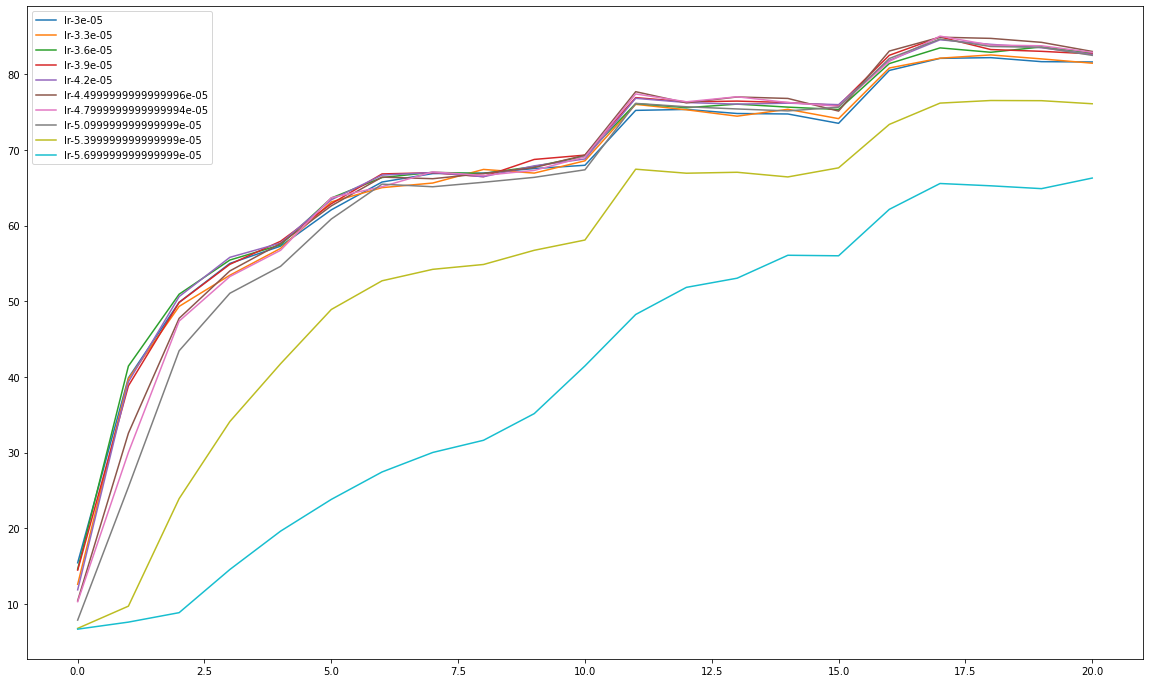

In [12]:
plt.figure(figsize=(20,12))
labels = []
for lr,acc in zip(lrs,acc_avg):
    plt.plot(acc,label='lr-{}'.format(lr))
    labels.append('lr-{}'.format(lr))
plt.legend()
plt.show

## Loss Chart

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,12))
labels = []
for lr,loss in zip(lrs,losses):
    plt.plot(accs,label='lr-{}'.format(lr))
    labels.append('lr-{}'.format(lr))
plt.legend(loc='best')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

## Check Acc and Loss

In [17]:
batch_step = 50
new_acc = acclist[0::batch_step]
new_loss = losslist[0::batch_step]

In [18]:
import matplotlib.pyplot as plt

In [19]:
x_label = [i*batch_step for i in range(len(new_acc))]
new_acc = [np.mean(np.array(acclist[i*batch_step:(i+1)*batch_step])) for i in range(len(new_acc))]
loss_acc = [np.mean(np.array(losslist[i*batch_step:(i+1)*batch_step])) for i in range(len(new_loss))]

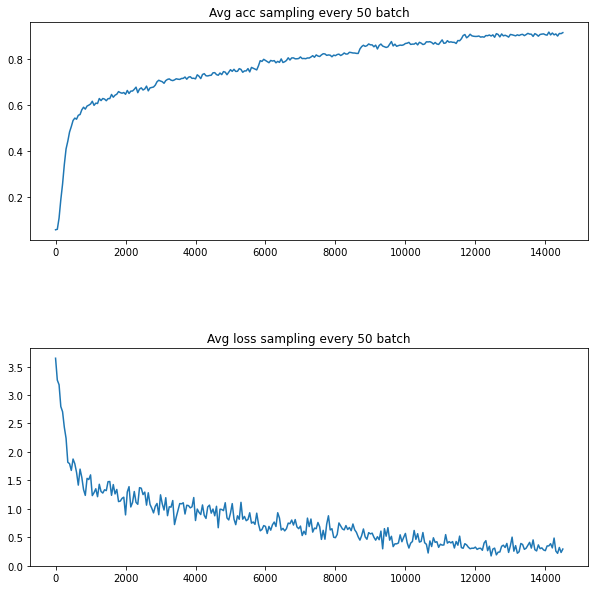

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,1,1,)
ax1.plot(x_label,new_acc)
ax1.set_title('Avg acc sampling every {} batch'.format(batch_step))
ax2 = plt.subplot(2,1,2,sharex=ax1)
ax2.plot(x_label,new_loss)
ax2.set_title('Avg loss sampling every {} batch'.format(batch_step))
plt.subplots_adjust(wspace =0, hspace =0.5)
plt.show()
plt.savefig('./img/{}-{}-acc-loss.jpg'.format(LEARN_RATE,MAX_SEQ_LENGTH))

## Visualization

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
iterator = train_val_loaders
true_labels = []
pred_outputs = []

model.eval()
tkz = AutoTokenizer.from_pretrained(MODEL_NAME)
with torch.no_grad():
    for ba,data in enumerate(notetqdm(iterator['test'])):
        
        features = data['input_ids'].cuda()
        att_mask = data['attention_mask'].to('cuda')
        targets = data['targets']
        targets.numpy()
        true_labels += targets.tolist()
        outputs = model(features,att_mask)
        outputs = outputs.cpu().detach().numpy()
        outputs = np.argmax(outputs,axis=1)
        '''
        # print screen 
        for i in range(len(data)):
            print(data['origin_contents'][i])
            print('pred: ',lset[outputs[i]])
            print('true: ',lset[targets[i]])
            print('--------------')
        
        '''
        
        pred_outputs += outputs.tolist()
    print(len(true_labels))
    print(true_labels[:15])
    print(len(pred_outputs))
    print(pred_outputs[:15])

  0%|          | 0/665 [00:00<?, ?it/s]

85073
[21, 1, 0, 5, 13, 13, 8, 25, 23, 18, 23, 5, 21, 15, 1]
85073
[21, 1, 0, 5, 13, 13, 8, 25, 23, 18, 23, 5, 21, 15, 1]


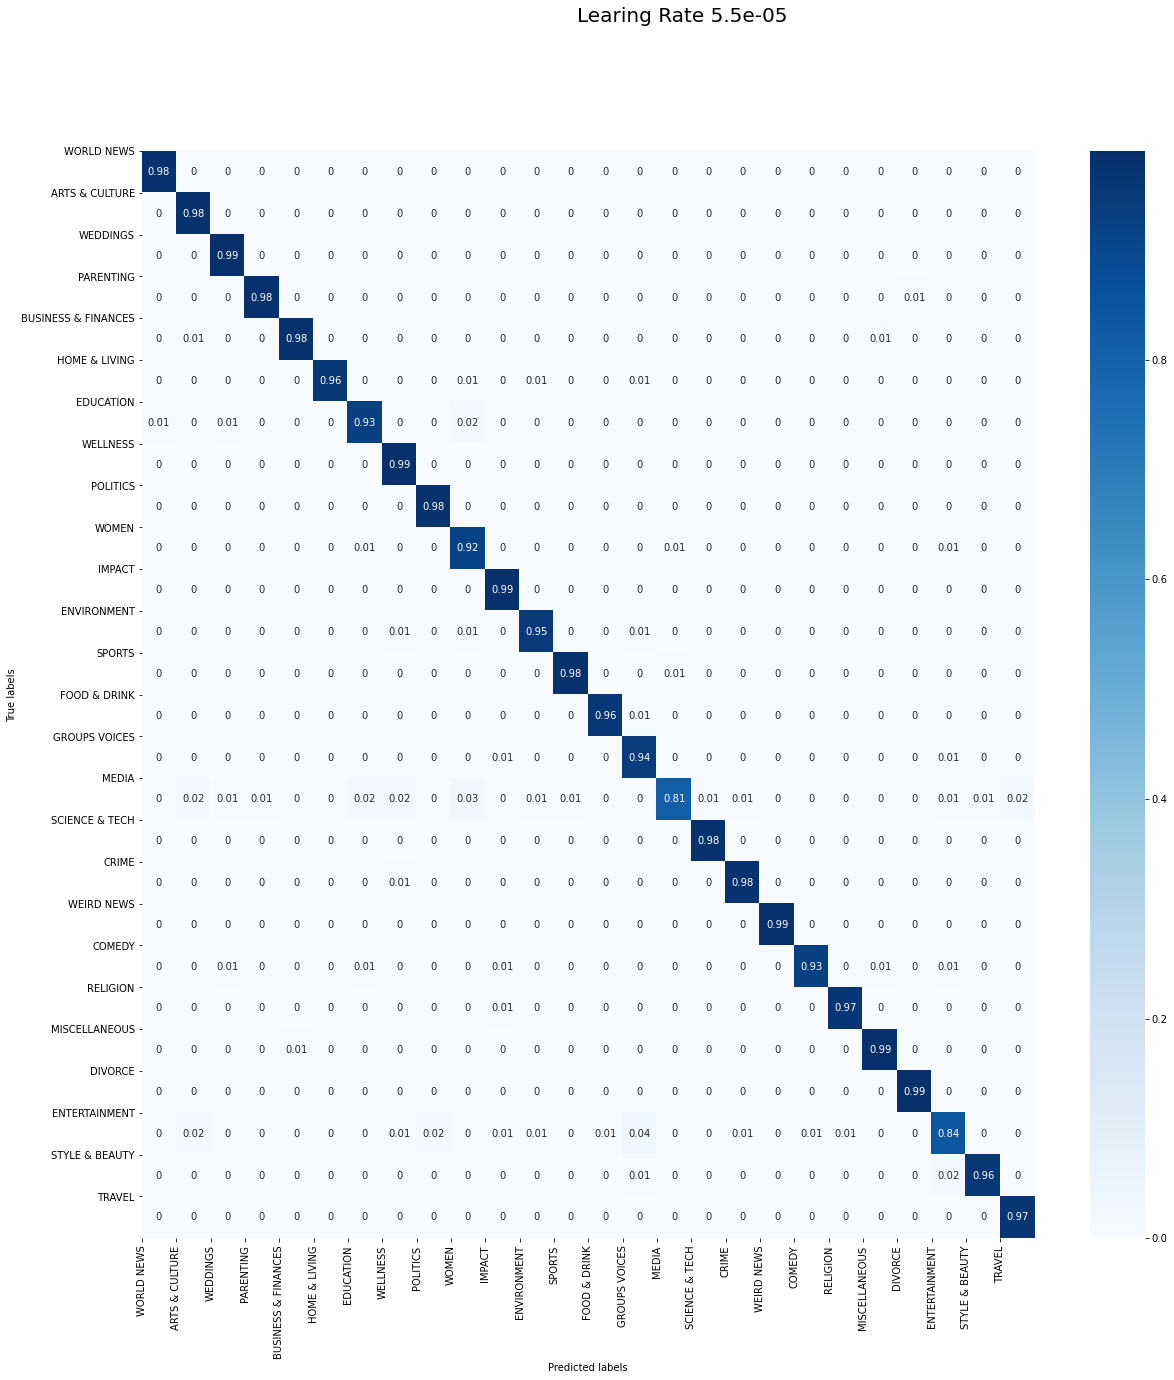

<Figure size 432x288 with 0 Axes>

In [25]:
lset = list(lset)
true_cate = [lset[i] for i in true_labels]
pred_cate = [lset[j] for j in pred_outputs]
# print(true_cate[:20])
# print(pred_cate[:20])
con_mat = confusion_matrix(true_cate,pred_cate)
con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]     # nomalization
con_mat_norm = np.around(con_mat_norm, decimals=2)

# === plot ===
fig = plt.figure(figsize=(20, 20))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')
catee = list(range(0,len(lset),1))
fig.suptitle('Learing Rate '+str(LEARN_RATE),fontsize=20)
plt.xlabel('Predicted labels')
plt.xticks(catee,lset)
plt.xticks(rotation=90)

plt.ylabel('True labels')
plt.yticks(catee,lset)
plt.yticks(rotation=360)
plt.show()
plt.savefig('./img/{}-{}-fake-matrix.jpg'.format(LEARN_RATE,MAX_SEQ_LENGTH))
plt.show()

## Transformers Trainer

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total # of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    load_best_model_at_end=True,
    label_names=['label']
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset
)

In [ ]:
a = torch.Tensor([[0,0,1],
                  [1,0,0]])
print(a.shape)
b = torch.Tensor([2,0]).long()
print(b.shape)
print(criterion(a,b))

In [ ]:
for data in train_val_loaders['valid']:
    print('label:',data['targets'].tolist())

In [15]:
torch.save(model.module.state_dict(),'./results/12-12module.pth')

In [17]:
state_dict

OrderedDict([('module.bert.embeddings.position_ids',
              tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
                        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
                        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
                        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
                        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
                        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
                        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
                        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
                       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
                       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
                 

## Check

In [5]:
for i in range(10):
    print('----------------')
    print(labels[i])
    print(contents[i])

----------------
WORLD NEWS
El nuevo Director General de la OMS debe dar prioridad a los trabajadores sanitarios comunitariosPor Carl Manlan En 1978, se firmó la Declaración de Alma-Ata con el ambicioso objetivo de lograr "La salud para todos en el año 2000"
----------------
MEDIA
Donald Trump ha traído la lucha por la libertad de prensa"Como profesión, luchemos por lo que es correcto", dijo Christiane Amanpour de CNN. "Luchemos por nuestros valores".
----------------
GROUPS VOICES
LeBron James tiene la mejor respuesta al anuncio racista en línea de H&M"¡Nos malinterpretamos a todos! ¡Y no vamos a hacerlo! ¡Derecha!"
----------------
SCIENCE & TECH
Sí, puedes alquilar tu bastón ocular por dineroEn noviembre de 1954, Sammy Davis Jr., de 29 años, estaba conduciendo a Hollywood cuando un accidente de coche dejó su ojo roto más allá de las reparaciones
----------------
ENVIRONMENT
Corte: La ley ambiental clave no se aplica a parte de Enbridge Keystone XL "Clone"Un tribunal de distrito de E

In [16]:
for i in range(1,10,1):
    data = train_dataset[i]
    print(data['origin_contents'])
    print(lset[data['targets'].numpy().tolist()])

Donald Trump ha traído la lucha por la libertad de prensa"Como profesión, luchemos por lo que es correcto", dijo Christiane Amanpour de CNN. "Luchemos por nuestros valores".
MEDIA
LeBron James tiene la mejor respuesta al anuncio racista en línea de H&M"¡Nos malinterpretamos a todos! ¡Y no vamos a hacerlo! ¡Derecha!"
GROUPS VOICES
Sí, puedes alquilar tu bastón ocular por dineroEn noviembre de 1954, Sammy Davis Jr., de 29 años, estaba conduciendo a Hollywood cuando un accidente de coche dejó su ojo roto más allá de las reparaciones
SCIENCE & TECH
Corte: La ley ambiental clave no se aplica a parte de Enbridge Keystone XL "Clone"Un tribunal de distrito de EE.UU. para el Distrito de Columbia ha dictaminado que el Flanagan South Pipeline de 600 millas de largo de Enbridge, un "clone" de Keystone XL, está autorizado legalmente para iniciar la apertura de negocios en octubre.
ENVIRONMENT
Formas creativas de ahorrar en una boda: Aprender chalecoCuando les mostramos cómo Abigail Dalton planeó su

In [18]:
for i,data in enumerate(train_val_loaders['valid']):
    print(data['origin_contents'][0])
    label = lset[data['targets'][0].numpy().tolist()]
    print(label)
    print('----------------')

La conversación imposible: hablar con los niños sobre la islamofobiaIntenté empezar una conversación con él, pero rápidamente me di cuenta de que no iba a ir a ninguna parte.
PARENTING
----------------
Una cosa más que no comeré (y por qué)Bueno, está casi extinguido gracias al insaciable apetito humano por sushi. ¿Miedo a los tiburones? No hay problema, hemos matado a casi todos ellos.
ENVIRONMENT
----------------
Hablando con los niños para que escuchenNos hemos convertido en esos padres que ya están molestos antes de que suceda algo molesto. Que usan el tiempo como muletas, entregándolos de la mañana a la noche. Estamos dejando que el poder lucha con un niño pequeño quite nuestro poder como padres.
PARENTING
----------------
El reportero de los '60 minutos' revela la razón refrigerante de Trump para aplastar a la prensaLesley Stahl dijo que Trump admitió que ataca a periodistas por lo que "Nadie los creerá".
MEDIA
----------------
El sexismo de los padres puede curvar las ambiciones

Un número impactante de padres mantienen las opioides sobrantes de sus hijos"Esta es una oportunidad perdida para prevenir el uso indebido de medicamentos recetados entre los niños".
WELLNESS
----------------
Recordando la masacre en la rodilla heridaCincuenta y un años antes de que la fuerza de ataque japonesa lanzara sus bombas mortales en Pearl Harbor, ocurrió otro "Día de la Infamia" que vivirá para siempre en la mente del pueblo Lakota (Sioux).
MEDIA
----------------
Servidor embarazada recibe una propina de $900 justo a tiempo para la Navidad"Siempre escuchas acerca de estas [cosas] sucediendo, pero nunca esperas ser el receptor de ello."
MISCELLANEOUS
----------------
Discursos de Oscar: ¿Qué ganadores del Oscar agradecieron a sus cónyuges en el escenario?Ganar un Oscar no es una pequeña hazaña, y a menudo puede dejar estrellas perfectamente aturdidas y sin palabras en el escenario.
WEDDINGS
----------------
Un policía se enfrenta a cargos de violación en serie, pero sus 13 acus

Jimmy Kimmel desgarra a Trump por hacer "peor que nada" para detener la violencia armada"Si no estás de acuerdo que tenemos que hacer algo al respecto, obviamente estás mentalmente enfermo".
COMEDY
----------------
Mejores citas de estilo: Gwen Stefani, Lauren Hutton, Lady Gaga y más sobre el maquillajeMuchas estrellas recogen consejos de belleza mientras están en el set de una película, en una sesión de fotos o mientras viajan, por lo que no es sorpresa que estén
STYLE & BEAUTY
----------------
Nueva lista de chequeo de vuelta a la escuela Artículo en California: Inscribirse en la cobertura de saludAquí en California, es nuestro objetivo inscribir aún más familias mientras miramos hacia adelante para el nuevo período de inscripción abierto a partir del 15 de noviembre de 2014.
IMPACT
----------------
El profesor renuncia después de enviar una carta anti-gay sorprendentemente a un periódico estudiantilMichael Stack citó un pasaje bíblico que afirmaba que los gays "recibían morir".
GROU